In [5]:
import matplotlib
import matplotlib.pyplot as plt

is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

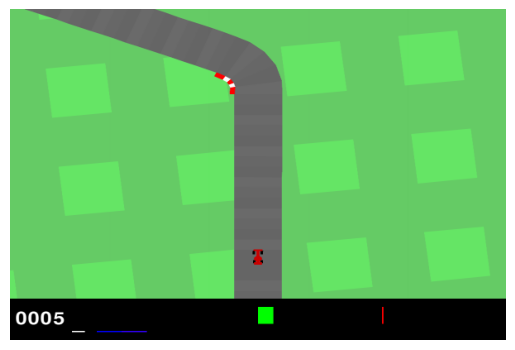

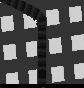

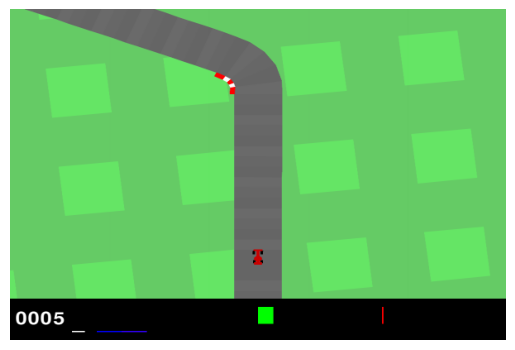

In [61]:
import gymnasium as gym
import gnwrapper
from PIL import Image, ImageOps

env = gym.make('CarRacing-v2', continuous=False, render_mode="rgb_array")
env = gnwrapper.Animation(env)

obs = env.reset()

for _ in range(20):
    obs, reward, term, trunc, info = env.step(env.action_space.sample())
    env.render()
    obs = obs[:88, 6:90]
    image = Image.fromarray(obs)
    image = image.convert('L')
    image = ImageOps.equalize(image)
    image.show()

    # next_obs = next_obs[30:40, 30:40,] 
    # print(next_obs.shape)
    if term or trunc:
        obs = env.reset()

In [1]:
import random
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

def build_model():
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Conv2D(filters=6, kernel_size=(4, 4), strides=4, activation='relu', input_shape=(84, 84, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(filters=24, kernel_size=(4, 4), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(5, activation=None))
        model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, epsilon=1e-7))
        return model

model = build_model()

model.summary()

2024-01-20 12:03:39.928575: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 12:03:39.928629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 12:03:39.964564: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-20 12:03:40.056905: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-20 12:03:41.365503: W tensorflow/compiler/tf2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 6)         294       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 24)          2328      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 24)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 216)               0         
                                                                 
 dense (Dense)               (None, 128)               2

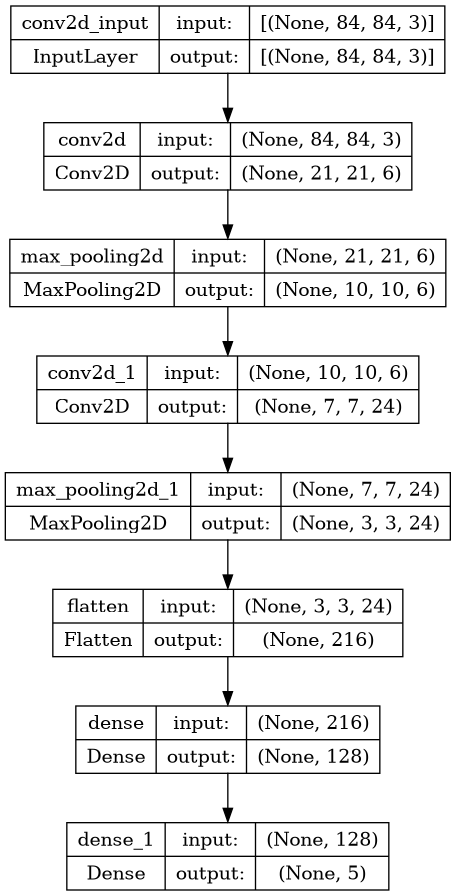

In [8]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)